In [617]:
import pandas as pd 
import numpy as np

In [618]:
df = pd.read_csv('Copy of Real_Estate.csv')

In [619]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [620]:
df = df.drop(columns = 'Transaction date')

In [621]:
df

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,35.5,274.01440,2,25.012148,121.546990,24.970725
2,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...
409,18.3,170.12890,6,24.981186,121.486798,29.096310
410,11.9,323.69120,2,24.950070,121.483918,33.871347
411,0.0,451.64190,8,24.963901,121.543387,25.255105
412,35.9,292.99780,5,24.997863,121.558286,25.285620


In [622]:
df.isnull().sum()

House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [623]:
# Create interaction features
df['Price per convenience store'] = df['House price of unit area'] / df['Number of convenience stores']
df['Price per distance'] = df['House price of unit area'] / df['Distance to the nearest MRT station']

# Avoid division by zero for House age impact
df['Age impact'] = df.apply(lambda row: row['House price of unit area'] / row['House age'] if row['House age'] > 0 else 0, axis=1)

# Display the updated dataset with new features
df.head()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,Price per convenience store,Price per distance,Age impact
0,13.3,4082.0150,8,25.007059,121.561694,6.488673,0.811084,0.001590,0.487870
1,35.5,274.0144,2,25.012148,121.546990,24.970725,12.485362,0.091129,0.703401
2,1.1,1978.6710,10,25.003850,121.528336,26.694267,2.669427,0.013491,24.267515
3,22.2,1055.0670,5,24.962887,121.482178,38.091638,7.618328,0.036104,1.715840
4,8.5,967.4000,6,25.011037,121.479946,21.654710,3.609118,0.022384,2.547613


In [624]:
df.isnull().sum()

House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
Price per convenience store            9
Price per distance                     0
Age impact                             0
dtype: int64

In [625]:
df.fillna(df.median(), inplace=True)

In [626]:
df.head()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,Price per convenience store,Price per distance,Age impact
0,13.3,4082.0150,8,25.007059,121.561694,6.488673,0.811084,0.001590,0.487870
1,35.5,274.0144,2,25.012148,121.546990,24.970725,12.485362,0.091129,0.703401
2,1.1,1978.6710,10,25.003850,121.528336,26.694267,2.669427,0.013491,24.267515
3,22.2,1055.0670,5,24.962887,121.482178,38.091638,7.618328,0.036104,1.715840
4,8.5,967.4000,6,25.011037,121.479946,21.654710,3.609118,0.022384,2.547613


In [627]:
df.isna().sum()

House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
Price per convenience store            0
Price per distance                     0
Age impact                             0
dtype: int64

In [628]:
print(np.isinf(df[features]).sum())

House age                               0
Distance to the nearest MRT station     0
Number of convenience stores            0
Latitude                                0
Longitude                               0
Price per convenience store            49
Price per distance                      0
Age impact                              0
dtype: int64


In [629]:
df['Price per convenience store'].replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN
df['Price per convenience store'].fillna(df['Price per convenience store'].median(), inplace=True)  # Replace NaNs with median

C:\Users\ANILA\AppData\Local\Temp\ipykernel_7628\2726572989.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\ANILA\AppData\Local\Temp\ipykernel_7628\2726572989.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [630]:
print(np.isinf(df[features]).sum())

House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
Price per convenience store            0
Price per distance                     0
Age impact                             0
dtype: int64


In [631]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1200x1200 with 0 Axes>

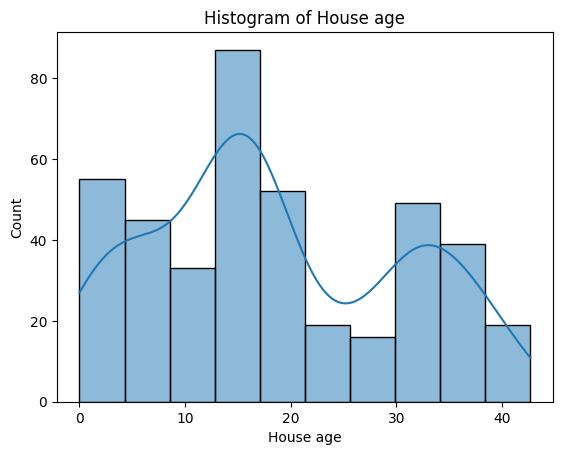

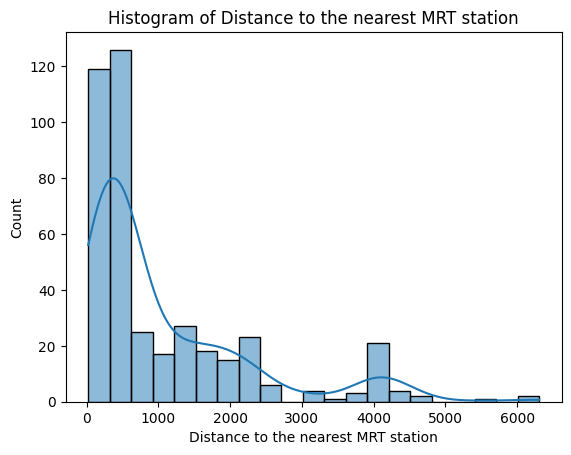

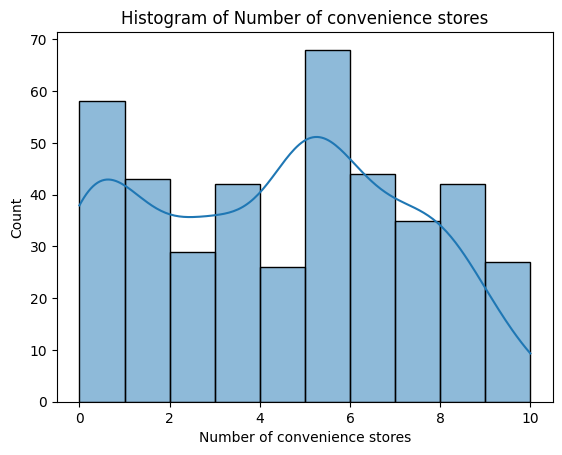

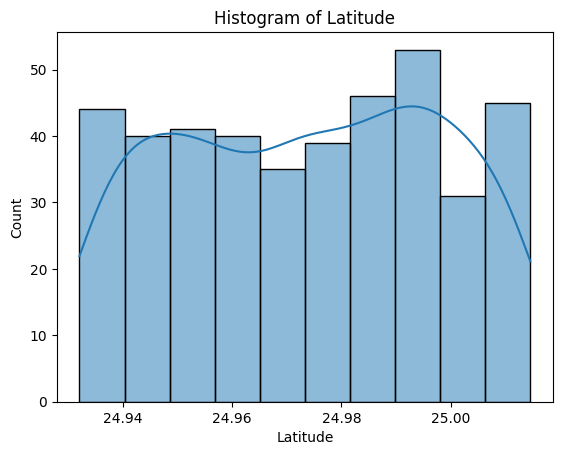

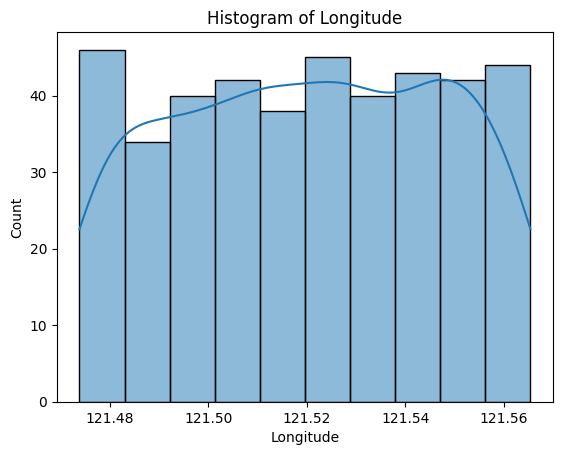

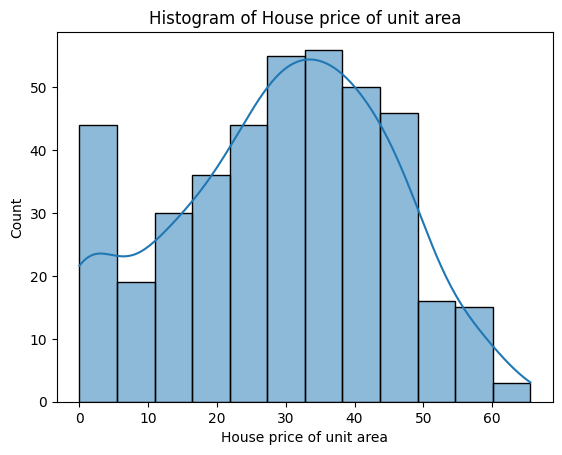

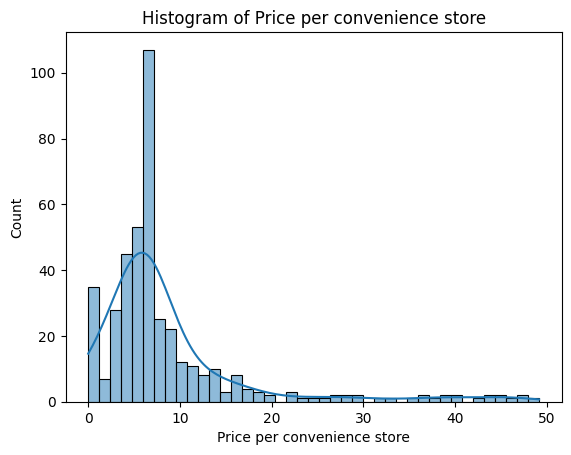

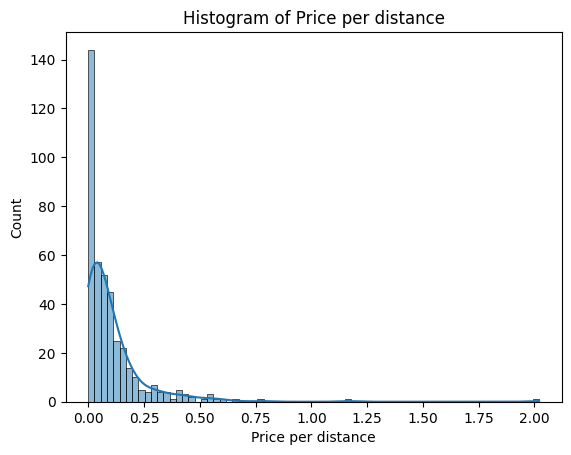

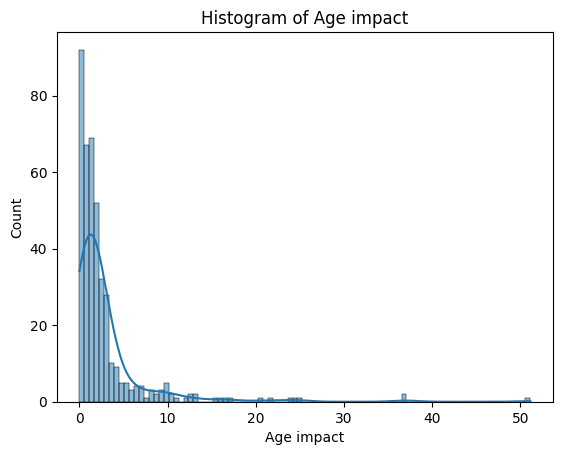

In [632]:
# create histogram for the numerical features
cols = ['House age','Distance to the nearest MRT station','Number of convenience stores','Latitude','Longitude','House price of unit area','Price per convenience store','Price per distance','Age impact']
plt.figure(figsize=(12, 12))
for col in cols:
    plt.figure()  # Create a new figure for each plot
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

<Figure size 1200x1200 with 0 Axes>

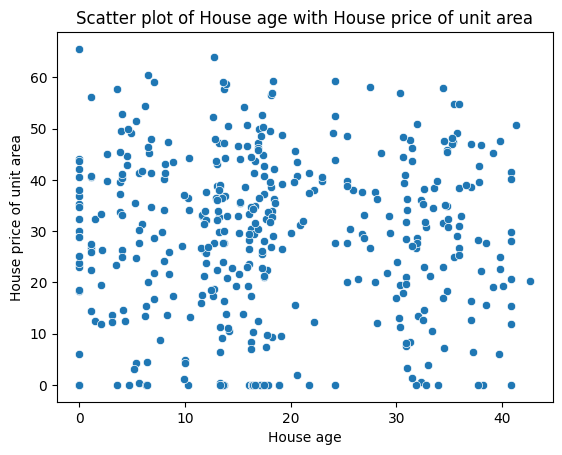

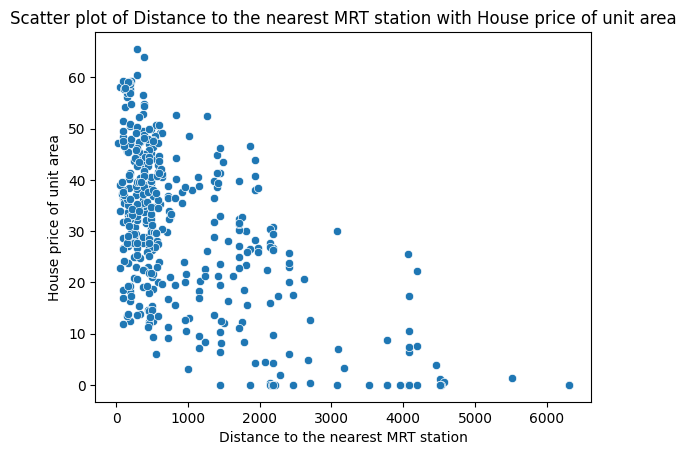

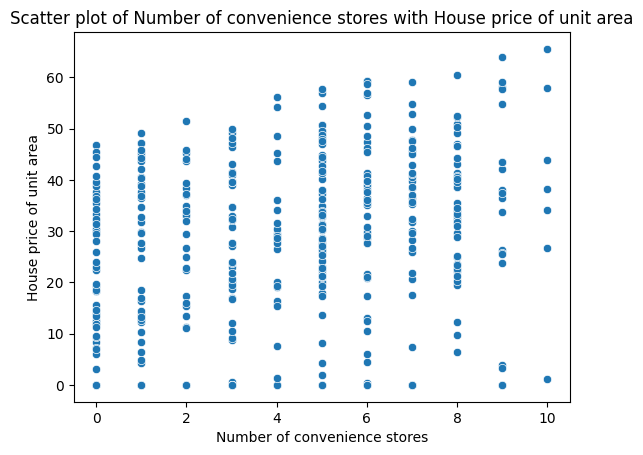

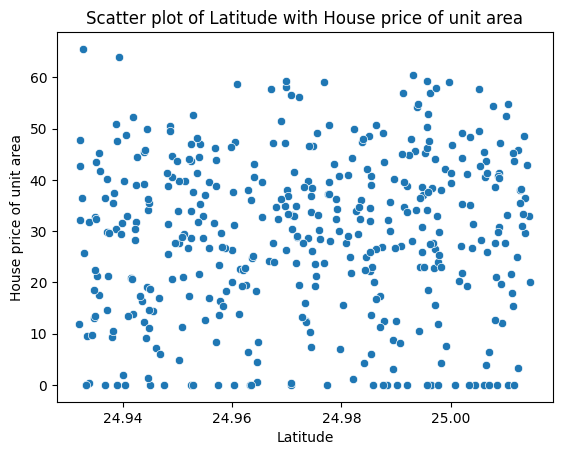

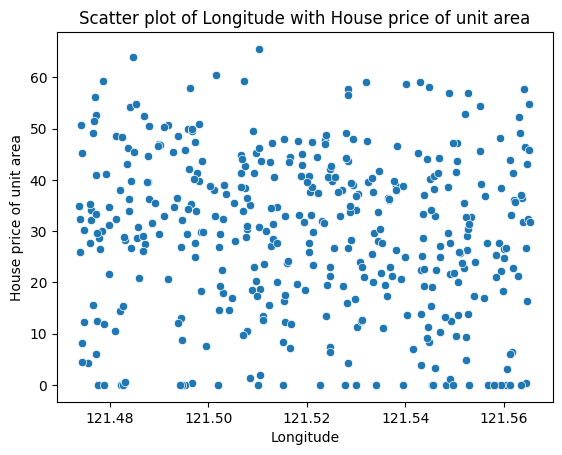

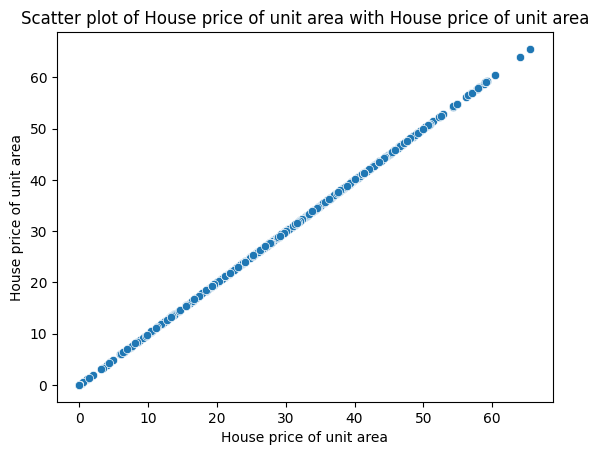

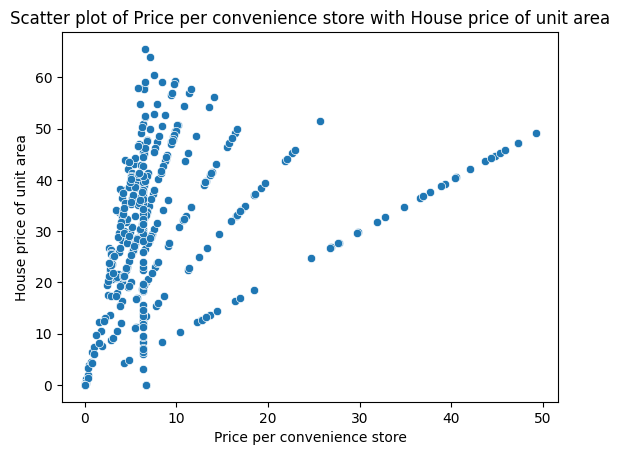

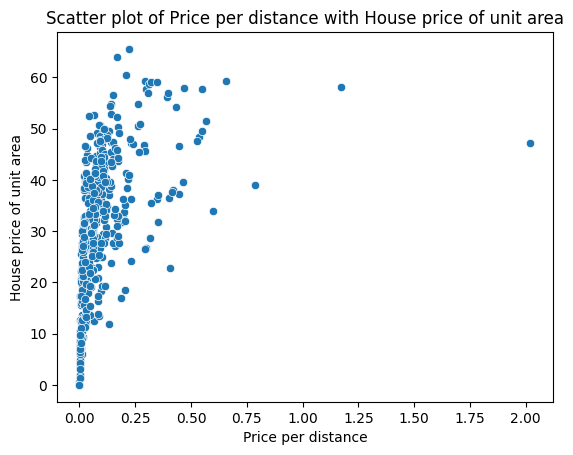

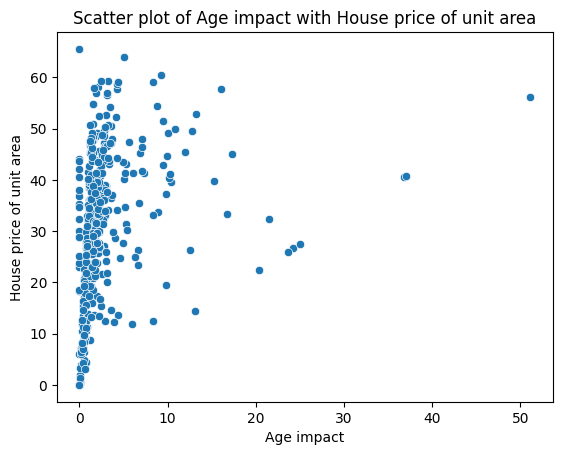

In [633]:
# Scatter plots to observe the relationship with house price
plt.figure(figsize=(12, 12))
for col in cols:
    plt.figure()  # Create a new figure for each plot
    sns.scatterplot(data=df, x=col, y='House price of unit area')
    plt.title(f'Scatter plot of {col} with House price of unit area')
    plt.show()

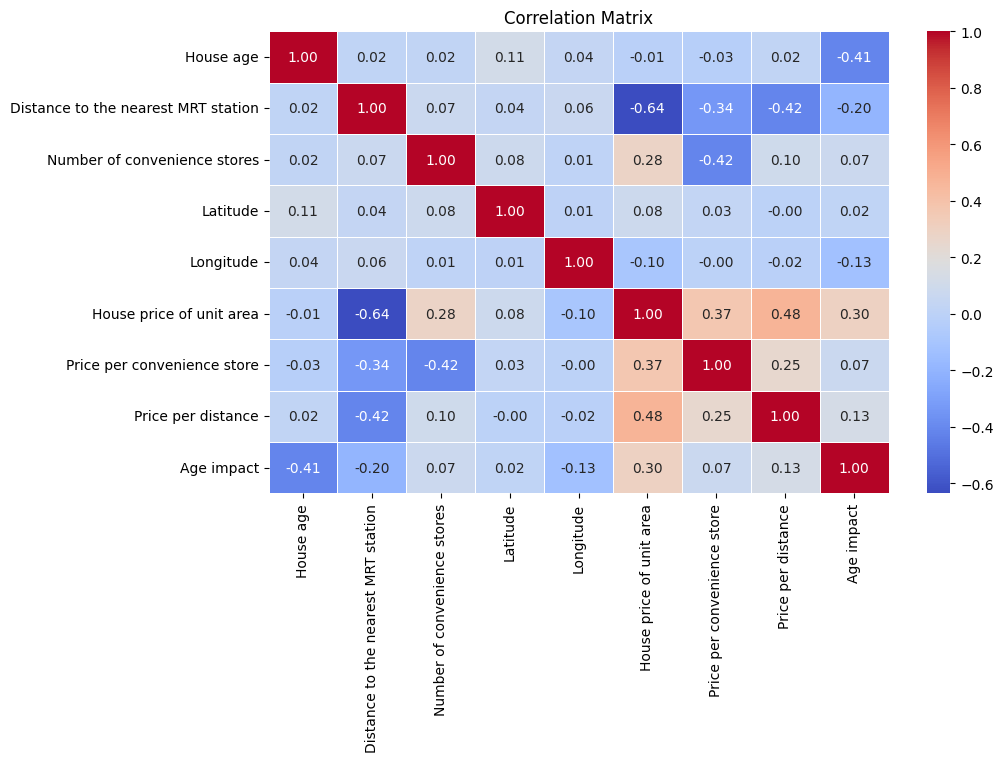

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   
Price per convenience store          -0.027643   
Price per distance                    0.024438   
Age impact                           -0.414509   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                   

In [634]:
# Correlation matrix
data = df.select_dtypes(include=[np.number])
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

<Figure size 1200x600 with 0 Axes>

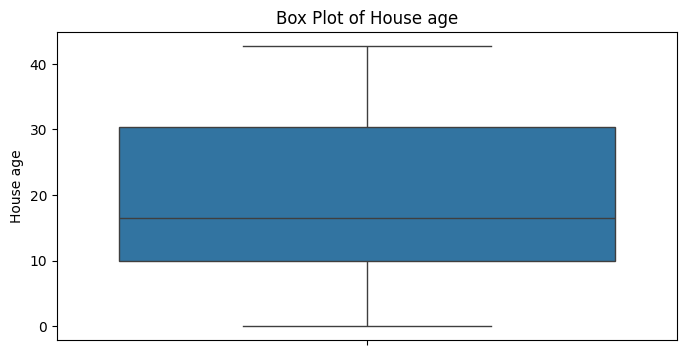

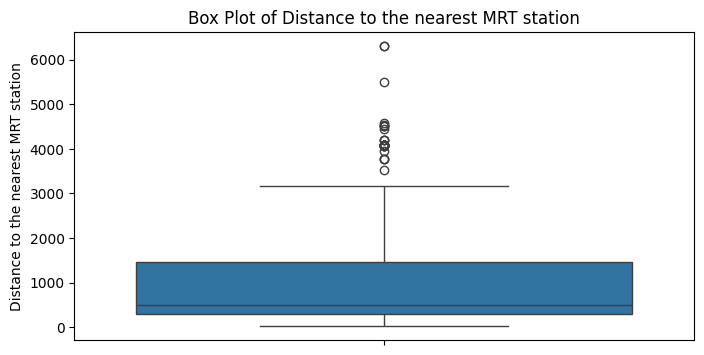

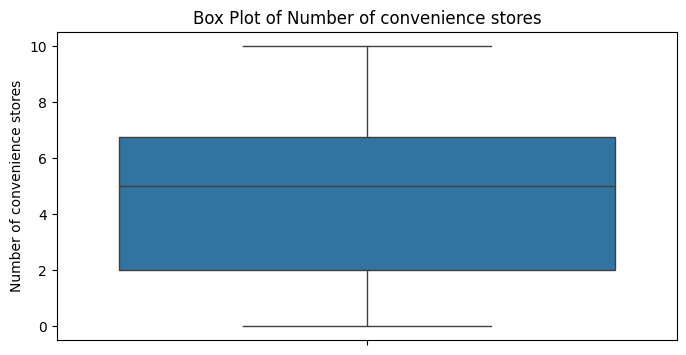

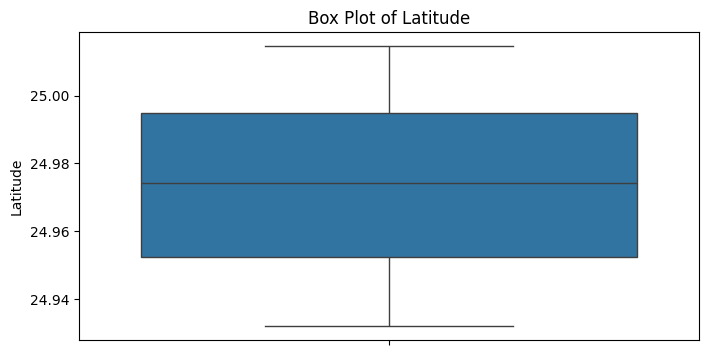

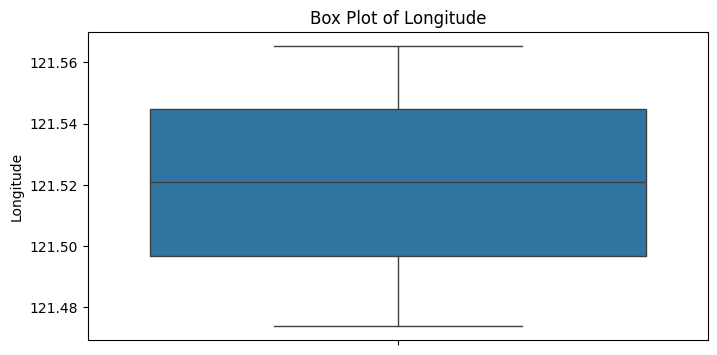

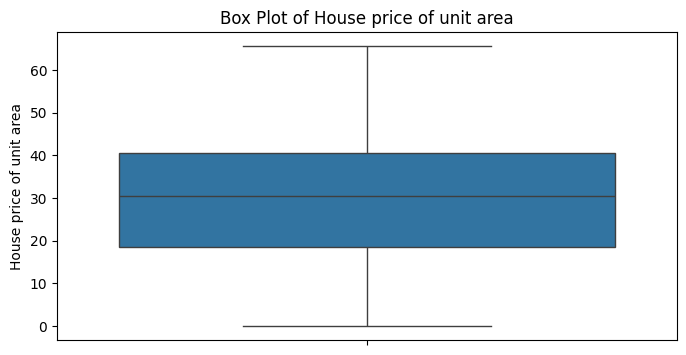

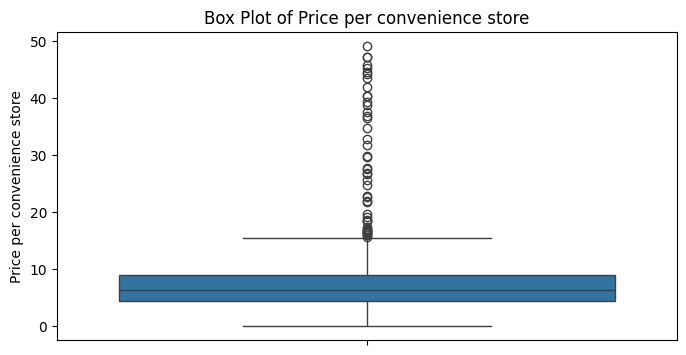

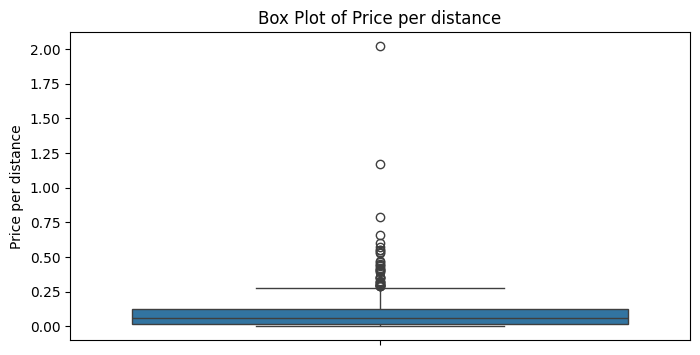

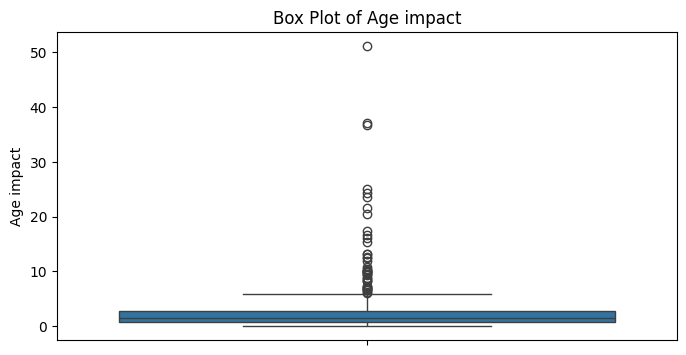

In [635]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Creating a box plot for each numerical feature
for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df[column])
    plt.title(f"Box Plot of {column}")
    plt.show()

In [636]:
Q1 = data['Distance to the nearest MRT station'].quantile(0.25)
Q3 = data['Distance to the nearest MRT station'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.2 * IQR

# Remove outliers
data = data[(data['Distance to the nearest MRT station'] >= lower_bound) & (data['Distance to the nearest MRT station'] <= upper_bound)]

<Axes: ylabel='Distance to the nearest MRT station'>

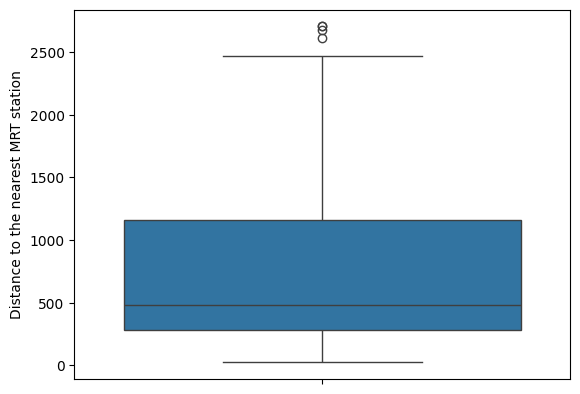

In [637]:
sns.boxplot(y=data['Distance to the nearest MRT station'])

In [638]:
Q1 = data['Price per convenience store'].quantile(0.25)
Q3 = data['Price per convenience store'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 0.9 * IQR
upper_bound = Q3 + 0.85 * IQR

# Remove outliers
data = data[(data['Price per convenience store'] >= lower_bound) & (data['Price per convenience store'] <= upper_bound)]

<Axes: ylabel='Price per convenience store'>

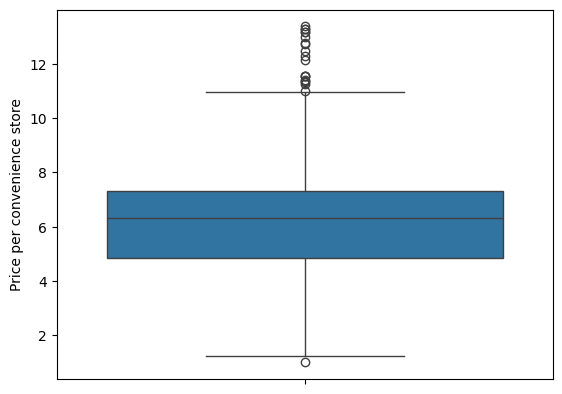

In [639]:
sns.boxplot(y=data['Price per convenience store'])

In [640]:
Q1 = data['Price per distance'].quantile(0.25)
Q3 = data['Price per distance'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.2 * IQR
upper_bound = Q3 + 1.05 * IQR

# Remove outliers
data = data[(data['Price per distance'] >= lower_bound) & (data['Price per distance'] <= upper_bound)]

<Axes: ylabel='Price per distance'>

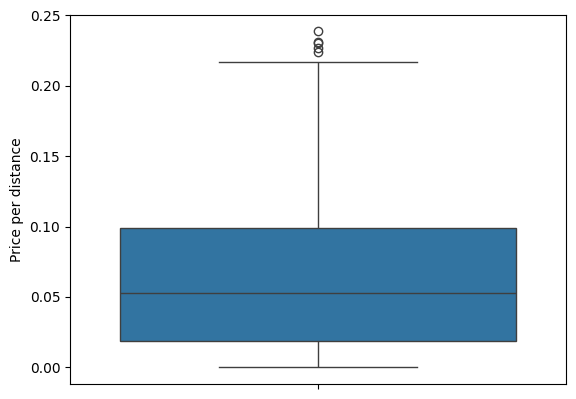

In [641]:
sns.boxplot(y=data['Price per distance'])

In [642]:
Q1 = data['Age impact'].quantile(0.25)
Q3 = data['Age impact'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.2 * IQR
upper_bound = Q3 + 1.05 * IQR

# Remove outliers
data = data[(data['Age impact'] >= lower_bound) & (data['Age impact'] <= upper_bound)]

<Axes: ylabel='Age impact'>

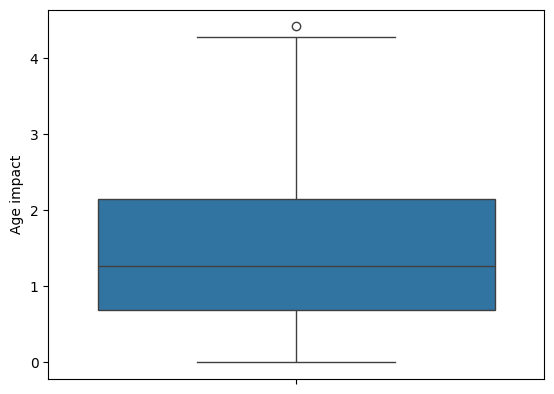

In [643]:
sns.boxplot(y=data['Age impact'])

<Figure size 1200x600 with 0 Axes>

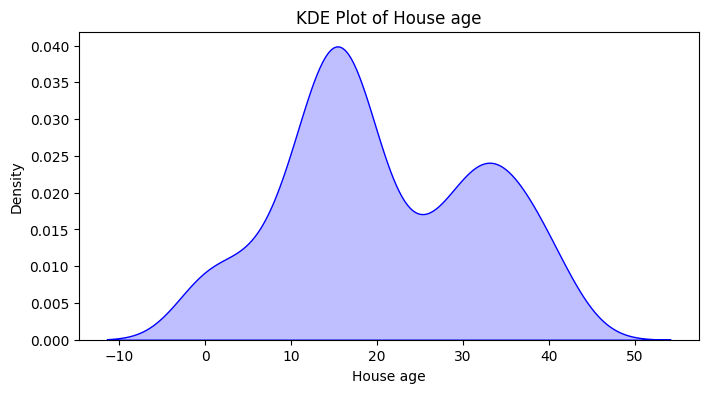

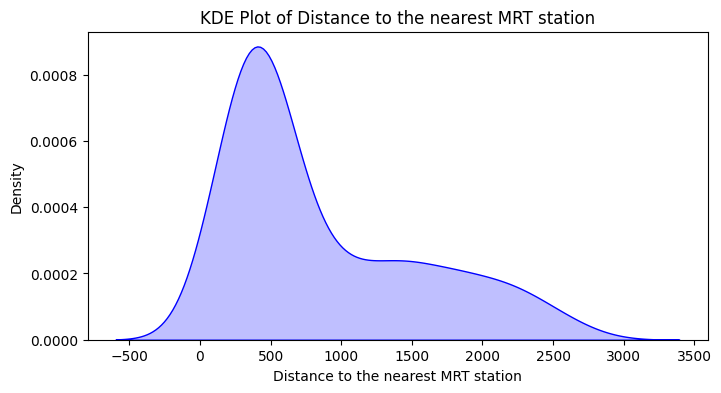

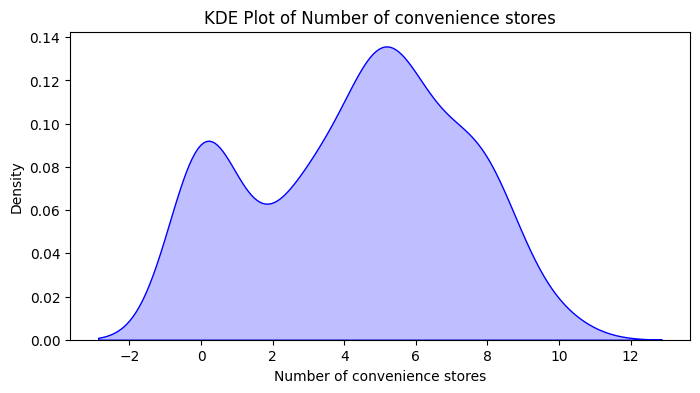

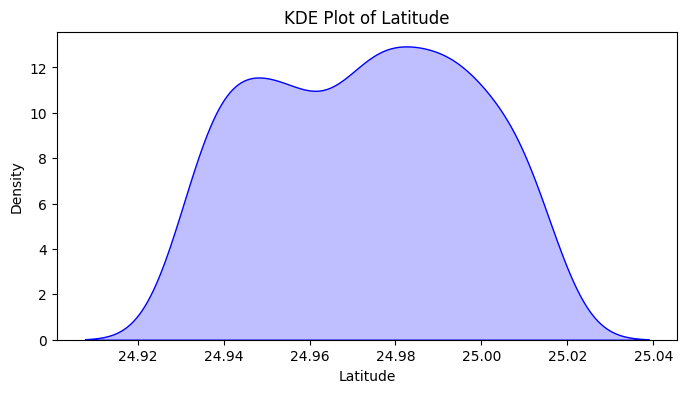

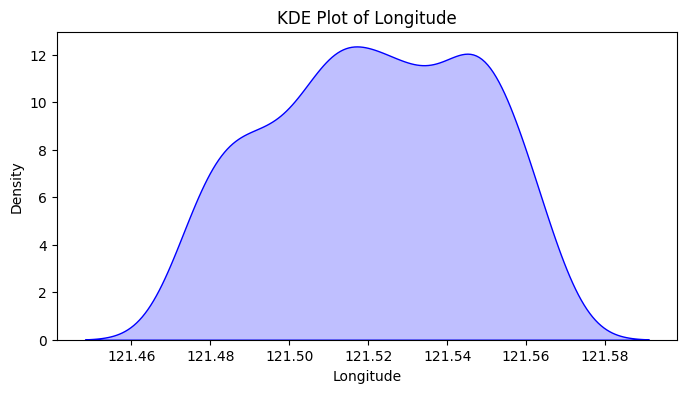

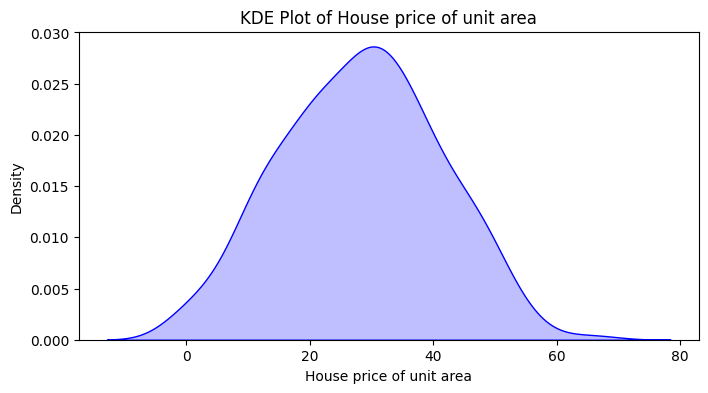

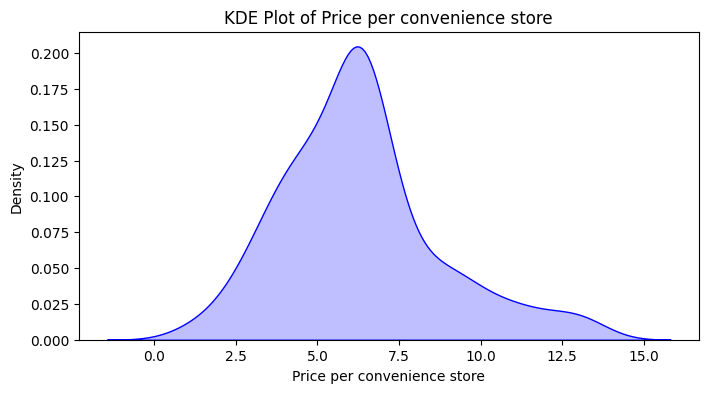

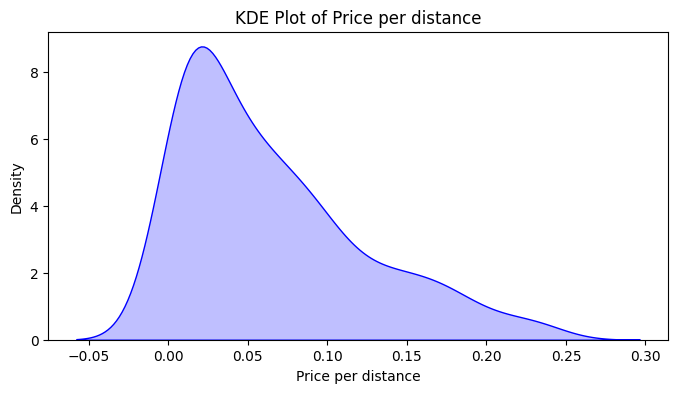

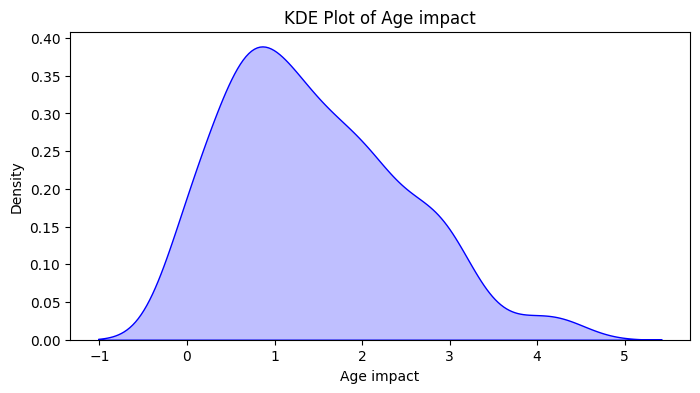

In [644]:
# Set figure size
plt.figure(figsize=(12, 6))

# Plot KDE for each numerical feature
for column in data.columns:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data[column], fill=True, color='blue')
    plt.title(f"KDE Plot of {column}")
    plt.xlabel(column)
    plt.show()

C:\Users\ANILA\AppData\Local\Temp\ipykernel_7628\994219087.py:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




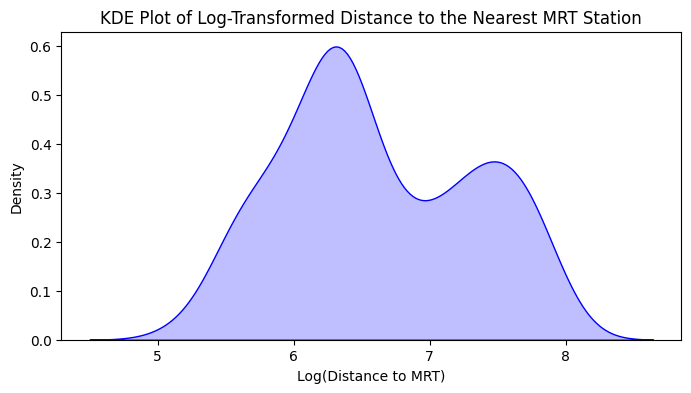

In [645]:
# Ensure all values are positive before applying log transformation
data['Distance to the nearest MRT station'] = data['Distance to the nearest MRT station'] + abs(data['Distance to the nearest MRT station'].min()) + 1

# Apply natural log transformation
data['Distance to the nearest MRT station'] = np.log(data['Distance to the nearest MRT station'])

# Plot KDE after log transformation
plt.figure(figsize=(8, 4))
sns.kdeplot(data['Distance to the nearest MRT station'], shade=True, color="blue")
plt.title("KDE Plot of Log-Transformed Distance to the Nearest MRT Station")
plt.xlabel("Log(Distance to MRT)")
plt.ylabel("Density")
plt.show()

In [646]:
df.head()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,Price per convenience store,Price per distance,Age impact
0,13.3,4082.0150,8,25.007059,121.561694,6.488673,0.811084,0.001590,0.487870
1,35.5,274.0144,2,25.012148,121.546990,24.970725,12.485362,0.091129,0.703401
2,1.1,1978.6710,10,25.003850,121.528336,26.694267,2.669427,0.013491,24.267515
3,22.2,1055.0670,5,24.962887,121.482178,38.091638,7.618328,0.036104,1.715840
4,8.5,967.4000,6,25.011037,121.479946,21.654710,3.609118,0.022384,2.547613


C:\Users\ANILA\AppData\Local\Temp\ipykernel_7628\3261747743.py:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




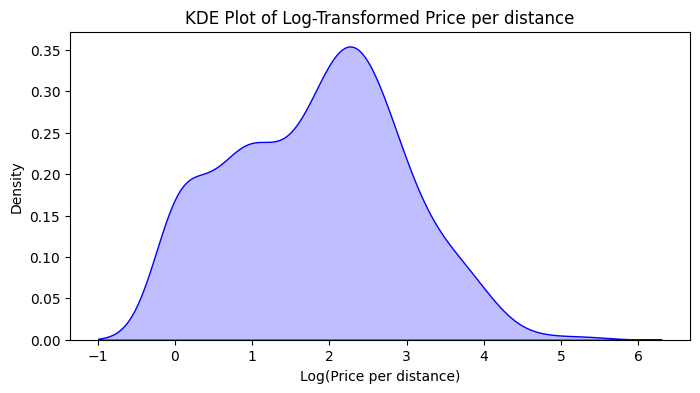

In [647]:
# Scaling 'Price per distance' to avoid log issues
df['Price per distance'] = (df['Price per distance'] * 100) + 1

# Apply log transformation
df['Price per distance'] = np.log(df['Price per distance'])

# Plot KDE after log transformation
plt.figure(figsize=(8, 4))
sns.kdeplot(df['Price per distance'], shade=True, color="blue")
plt.title("KDE Plot of Log-Transformed Price per distance")
plt.xlabel("Log(Price per distance)")
plt.ylabel("Density")
plt.show()

In [648]:
print(data['Price per convenience store'].skew())

0.7429557298823349


In [649]:
df=pd.DataFrame(df)
df.head()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,Price per convenience store,Price per distance,Age impact
0,13.3,4082.0150,8,25.007059,121.561694,6.488673,0.811084,0.147521,0.487870
1,35.5,274.0144,2,25.012148,121.546990,24.970725,12.485362,2.313814,0.703401
2,1.1,1978.6710,10,25.003850,121.528336,26.694267,2.669427,0.854033,24.267515
3,22.2,1055.0670,5,24.962887,121.482178,38.091638,7.618328,1.528304,1.715840
4,8.5,967.4000,6,25.011037,121.479946,21.654710,3.609118,1.175093,2.547613


Feature names used during training: ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude', 'Price per convenience store', 'Price per distance', 'Age impact']


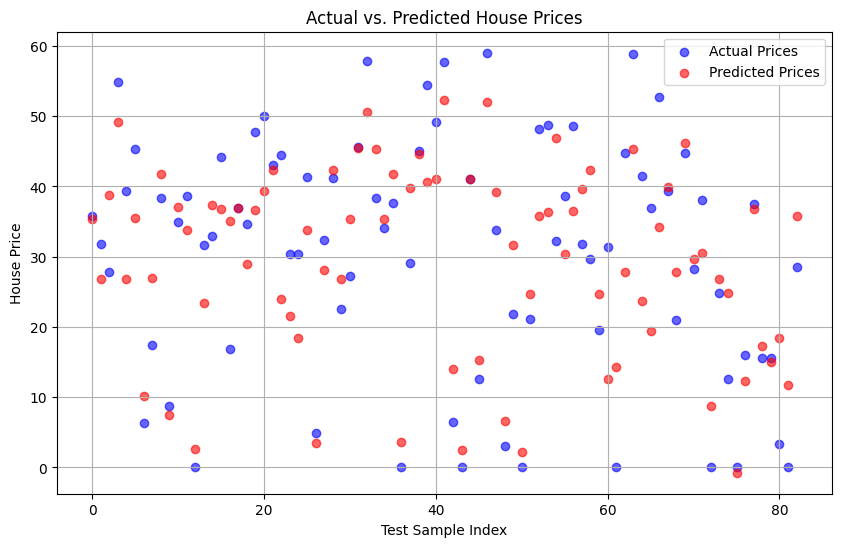

In [650]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Handling infinite values and NaNs
#df.replace([np.inf, -np.inf], np.nan, inplace=True)
#df.fillna(df.median(), inplace=True)

# Selecting features and target
features = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores', 
            'Latitude', 'Longitude','Price per convenience store','Price per distance','Age impact']


target = 'House price of unit area'

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

print("Feature names used during training:", X_train.columns.tolist())


# Applying robust scaling
#scaler = RobustScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# **Use separate scalers for X and y**
feature_scaler = RobustScaler()
target_scaler = RobustScaler()

# Fit and transform features and target separately
X_train_scaled = feature_scaler.fit_transform(X_train)
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))

# Training Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

# Create a pipeline with Scaling and Model
pipeline = Pipeline([
    ('scaler', RobustScaler()),  # This will scale the features only
    ('model', LinearRegression())  # Change model as needed
])

# Train the model with transformed data
pipeline.fit(X_train, y_train_scaled)

# Save pipeline and target scaler together
joblib.dump((pipeline, target_scaler), 'model_pipeline.pkl')

# Transform test data using feature scaler
X_test_scaled = feature_scaler.transform(X_test)
y_pred_lr_scaled = model.predict(X_test_scaled).reshape(-1, 1)

# Inverse transform predictions back to original scale
y_pred_lr = target_scaler.inverse_transform(y_pred_lr_scaled)

# Create a combined scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.6, label="Actual Prices")
plt.scatter(range(len(y_pred_lr)), y_pred_lr, color='red', alpha=0.6, label="Predicted Prices")

# Labels and title
plt.title("Actual vs. Predicted House Prices")
plt.xlabel("Test Sample Index")
plt.ylabel("House Price")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

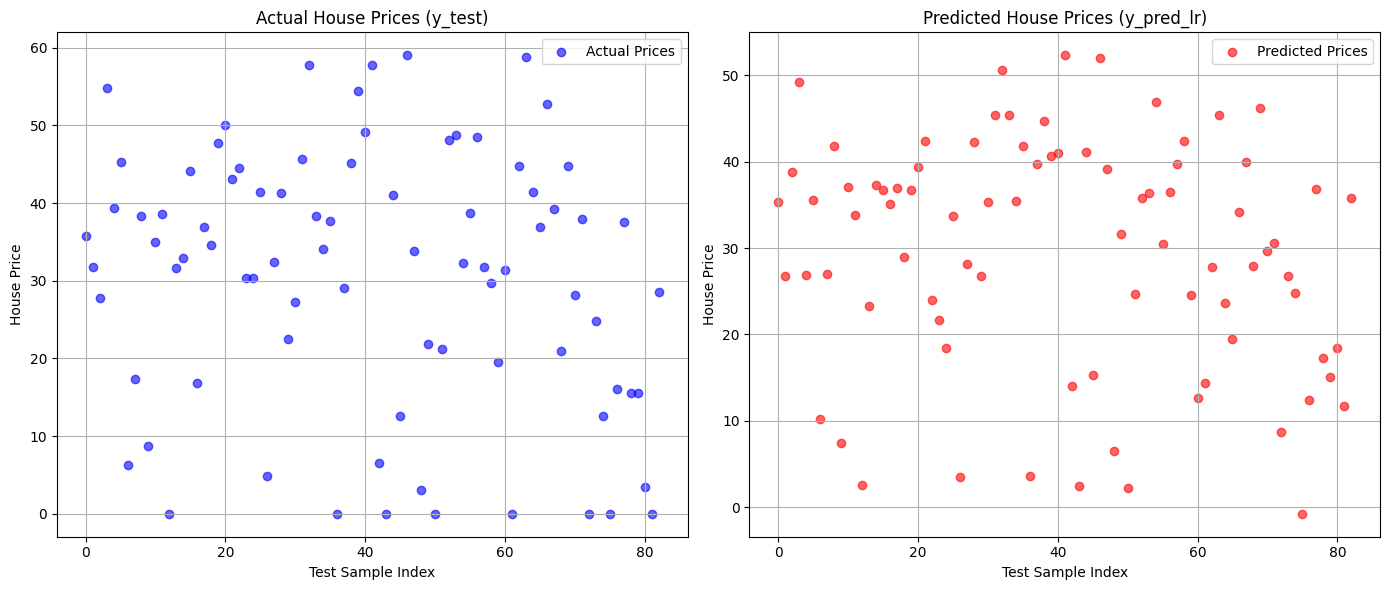

In [651]:
# Making predictions using the linear regression model
X_test_scaled = feature_scaler.transform(X_test)
y_pred_lr = target_scaler.inverse_transform(model.predict(X_test_scaled).reshape(-1, 1))

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: X_test vs Actual House Prices
axes[0].scatter(range(len(y_test)), y_test, color='blue', alpha=0.6, label="Actual Prices")
axes[0].set_title("Actual House Prices (y_test)")
axes[0].set_xlabel("Test Sample Index")
axes[0].set_ylabel("House Price")
axes[0].legend()
axes[0].grid(True)

# Plot 2: X_test vs Predicted House Prices
axes[1].scatter(range(len(y_pred_lr)), y_pred_lr, color='red', alpha=0.6, label="Predicted Prices")
axes[1].set_title("Predicted House Prices (y_pred_lr)")
axes[1].set_xlabel("Test Sample Index")
axes[1].set_ylabel("House Price")
axes[1].legend()
axes[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()

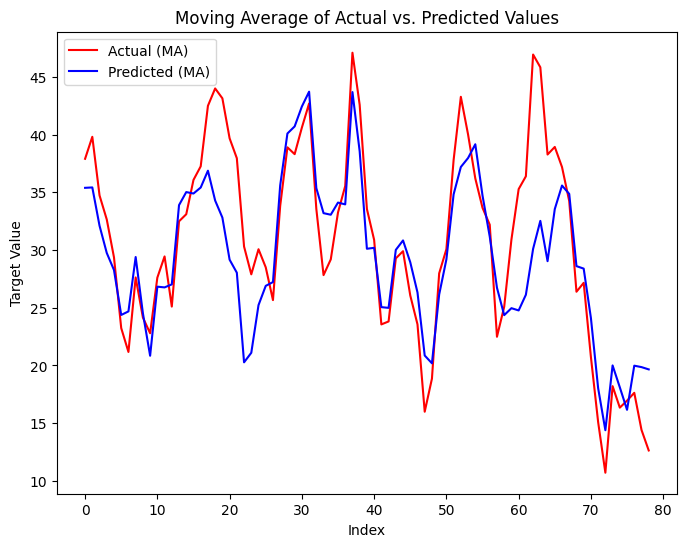

In [652]:
window_size = 5

# Convert y_test to 1D
y_test_1d = y_test if isinstance(y_test, pd.Series) else pd.Series(y_test.flatten())
y_pred_1d = y_pred_lr if isinstance(y_pred_lr, pd.Series) else pd.Series(y_pred_lr.flatten())

# Apply rolling mean
y_test_ma = y_test_1d.rolling(window=window_size).mean().dropna().reset_index(drop=True)
y_pred_ma = y_pred_1d.rolling(window=window_size).mean().dropna().reset_index(drop=True)

# Ensure both series have the same length
min_len = min(len(y_test_ma), len(y_pred_ma))
y_test_ma, y_pred_ma = y_test_ma[:min_len], y_pred_ma[:min_len]

# Plot
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test_ma)), y_test_ma, color='red', label='Actual (MA)')
plt.plot(range(len(y_pred_ma)), y_pred_ma, color='blue', label='Predicted (MA)')
plt.title("Moving Average of Actual vs. Predicted Values")
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.legend()
plt.show()

In [653]:
# Ensure y_test is in the correct shape
#y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))
print(y_test.shape)
print(y_pred_lr.shape)
# Check a few original vs. transformed values
print("Original y_test sample:", y_test[:5].values.flatten())
print("Predicted y_pred_lr sample:", y_pred_lr[:5].flatten())
#print("Original y_test sample:", y_test[:5])
#print("Predicted y_pred_lr sample:", y_pred_lr[:5])
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

(83,)
(83, 1)
Original y_test sample: [35.76266672 31.74366223 27.78689427 54.83166378 39.41648222]
Predicted y_pred_lr sample: [35.37430492 26.80318577 38.75849079 49.16749008 26.85955453]
Mean Squared Error (MSE): 80.36
R² Score: 0.7095


In [654]:
import dash
import joblib

In [613]:
from dash import Dash, html, dcc, Input, Output, State
import pandas as pd
import numpy as np
import joblib

# Load the saved pipeline
pipeline, target_scaler = joblib.load('model_pipeline.pkl')

# Dash app initialization
app = Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.Div([
        html.H1("Real Estate Price Prediction", style={'text-align': 'center'}),

        html.Div([
            dcc.Input(id='house_age', type='number', placeholder='House Age (years)',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='distance_to_mrt', type='number', placeholder='Distance to MRT Station (meters)',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='num_convenience_stores', type='number', placeholder='Number of Convenience Stores',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='latitude', type='number', placeholder='Latitude',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='longitude', type='number', placeholder='Longitude',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='price_per_convenience_store', type='number', placeholder='Price per Convenience Store',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='price_per_distance', type='number', placeholder='Price per Distance',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='age_impact', type='number', placeholder='Age Impact',
                      style={'margin': '10px', 'padding': '10px'}),
            html.Button('Predict Price', id='predict_button', n_clicks=0,
                        style={'margin': '10px', 'padding': '10px', 'background-color': '#007BFF', 'color': 'white'}),
        ], style={'text-align': 'center'}),

        html.Div(id='prediction_output', style={'text-align': 'center', 'font-size': '20px', 'margin-top': '20px'})
    ], style={'width': '50%', 'margin': '0 auto', 'border': '2px solid #007BFF', 'padding': '20px', 'border-radius': '10px'})
])

# Define callback to update output
@app.callback(
    Output('prediction_output', 'children'),
    [Input('predict_button', 'n_clicks')],
    [State('house_age', 'value'),
     State('distance_to_mrt', 'value'),
     State('num_convenience_stores', 'value'),
     State('latitude', 'value'),
     State('longitude', 'value'),
     State('price_per_convenience_store', 'value'),
     State('price_per_distance', 'value'),
     State('age_impact', 'value')]
)
def update_output(n_clicks, house_age, distance_to_mrt, num_convenience_stores, latitude, longitude,
                  price_per_convenience_store, price_per_distance, age_impact):
    if n_clicks > 0 and all(v is not None for v in [house_age, distance_to_mrt, num_convenience_stores, latitude, longitude,
                                                     price_per_convenience_store, price_per_distance, age_impact]):
        # Prepare the feature vector
        features = pd.DataFrame([[house_age, distance_to_mrt, num_convenience_stores, latitude, longitude,
                                  price_per_convenience_store, price_per_distance, age_impact]],
                                columns=['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
                                         'Latitude', 'Longitude', 'Price per convenience store',
                                         'Price per distance', 'Age impact'])
        
        # Predict (pipeline already scales input features)
        prediction_scaled = pipeline.predict(features)[0]

        # Inverse transform the prediction to get the actual price
        prediction_actual = target_scaler.inverse_transform(np.array(prediction_scaled).reshape(-1, 1))[0][0]

        return f'Predicted House Price of Unit Area: {prediction_actual:.2f}'
    elif n_clicks > 0:
        return 'Please enter all values to get a prediction'
    return ''

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)